## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import seaborn as sns

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
# answer goes here
fin_df = pd.read_csv('data/financial_wellbeing.csv')
fin_df





,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,6,7,7,61,3,3,1,...,1,2,3,0,0,0,1,2,-5,0.522504
6390,13118,3,2,7,7,7,59,3,4,2,...,1,3,6,0,0,0,0,3,-5,1.015219
6391,8709,1,3,5,6,6,59,3,4,3,...,1,1,2,0,0,0,0,2,0,1.136270
6392,8515,1,3,5,5,5,46,2,2,3,...,1,4,9,0,0,0,0,2,0,1.224941


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [3]:
# answer goes here
scores_df = fin_df.filter(like='score')
scores_df.head()




,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [4]:
# answer goes here
scaler = StandardScaler()
scores_std = scaler.fit_transform(scores_df)
scores_std





array([[-0.07306245, -0.53090616,  0.65383032,  1.62471561],
       [-0.35567668, -0.6099205 ,  0.65383032, -0.62962645],
       [-0.4969838 , -0.68893483,  0.65383032, -0.16084111],
       ...,
       [ 0.20955178,  0.02219421, -0.67039872, -1.42116191],
       [-0.70894447,  0.25923722, -0.67039872, -1.42116191],
       [-0.4969838 , -0.68893483, -0.67039872, -1.42116191]])

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [29]:
# answer goes here
inertias = []
ks = list(np.arange(2,10))
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scores_std)
    inertias.append(kmeans.inertia_)




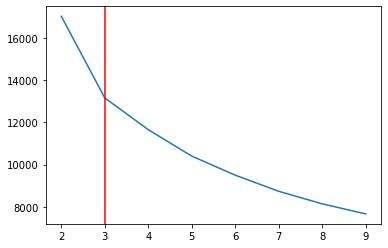

In [31]:
plt.plot(ks,inertias)
plt.axvline(x=3, c='red')

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

In [39]:
# answer goes here
sils = []
ks = list(np.arange(2,11))
for k in ks:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scores_std)
    sils.append(silhouette_score(scores_std, labels))

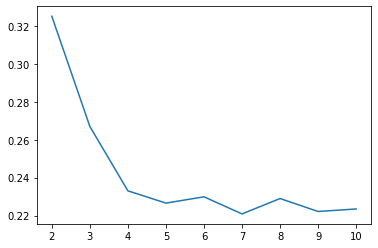

In [40]:
plt.plot(ks,sils)
#plt.axvline(x=2, c='red')

In [45]:
pca = PCA(n_components=2)
scores_pca = pca.fit_transform(scores_std)

In [53]:
scores_pca = pd.DataFrame(scores_pca)

In [70]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(scores_std)
scores_pca['labels'] = labels

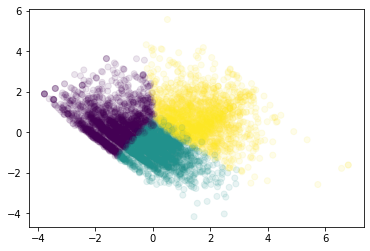

In [71]:
plt.scatter(scores_pca[0], scores_pca[1], c=scores_pca['labels'], alpha=0.1)